### Matplotlib 객체 구조

- Figure : 한 개 이상의 Axes 객체 포함하는 가장 큰 단위의 객체 (캔버스 틀)
- Axes : 두 개 이상의 Axis 객체 포함 (캔버스 안의 하위 영역)
- Axis : 축 정보를 담고 있는 객체 

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plot 생성
import matplotlib # 폰트, 환경설정 값 지정

#### 1. Figure 생성

- plt.figure() 함수 : figure 객체 반환
    - plt.plot() 함수를 실행하면 자동으로 figure 객체를 생성
    - figure 객체의 크기(plot 이미지의 크기)를 설정,생성하고 싶을 때 명시적으로 사용

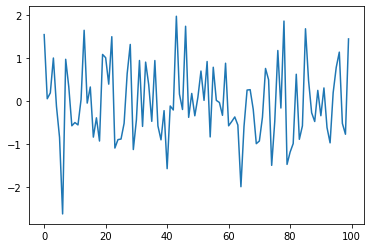

In [2]:
# figure() 함수를 사용하지 않고 plot()으로 생성되는 figure 객체
# 표준정규분포를 따르는 100개의 샘플
data = np.random.randn(100)
plt.plot(data)
plt.show()

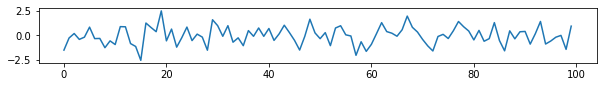

In [3]:
# figure() 함수를 이용하여 figure 객체 크기를 쉽게 지정해서 생성 가능
# 데이터 : 정규분포를 따르는 샘플 100개
# figure 크기 설정 : plt.figure(figsize=(w, h))
data = np.random.randn(100)
plt.figure(figsize=(10, 1))
plt.plot(data)
plt.show()

#### 2. Subplot 생성

- 하나의 윈도우(Figure)안에 여러 개의 이미지(plot)을 생성해야 하는 경우
- subplot() 함수
    - plt.subplot(row, col, idx)
        - 단독 생성 : idx 값으로 axes의 위치 지정
        - 2,2,1 => 221
    - plt.subplots(row, col)
        - figure, axes 객체 생성 : 행/열 구조만 설정하여 axes 객체 생성한 후 각각의 axes 객체로 위치 지정

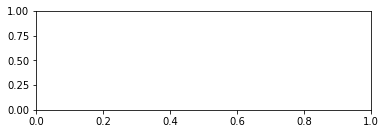

In [4]:
# 1. subplot()으로 단독 생성
# 2행 1열짜리 매트릭스 생성, 윗부분에 그릴 플롯 명령 실행
plt.subplot(2, 1, 1)

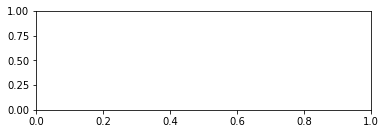

In [5]:
# 2행 1열짜리 매트릭스 생성, 아랫부분에 그릴 플롯 명령 실행
plt.subplot(2, 1, 2)

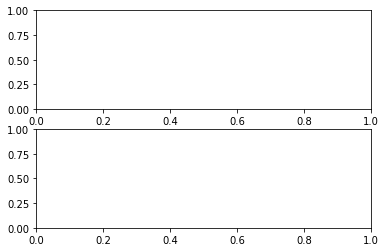

In [6]:
# 한 번에 모든 subplot을 화면에 띄우기 위해서는 모든 코드를 한 셀에 모아서 실행
plt.subplot(2, 1, 1)
plt.subplot(2, 1, 2)

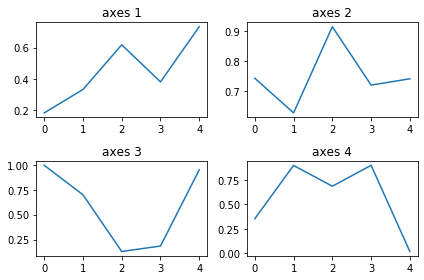

In [7]:
# subplot을 단독으로 생성하는 방법
# 하나의 figure 안에 총 4칸을 생성하고 각 칸마다 서로 다른 모양의 라인 플롯 생성
# 데이터 : 0과 1 사이의 난수 5개 => np.random.rand(5)
# 1) 틀 생성
# 2) 값, 그래프 그리기
# 3) 속성 지정
# 4) show()
plt.subplot(2, 2, 1) # plt.subplot(221)
plt.plot(np.random.rand(5))
plt.title('axes 1')

plt.subplot(2, 2, 2) # plt.subplot(222)
plt.plot(np.random.rand(5))
plt.title('axes 2')

plt.subplot(2,2,3)   # plt.subplot(223)
plt.plot(np.random.rand(5))
plt.title('axes 3')

plt.subplot(2,2,4)   # plt.subplot(224)
plt.plot(np.random.rand(5))
plt.title('axes 4')

# plt.tight_layout() : subplot간 여백/간격을 조정해주는 함수
plt.tight_layout()
plt.show()

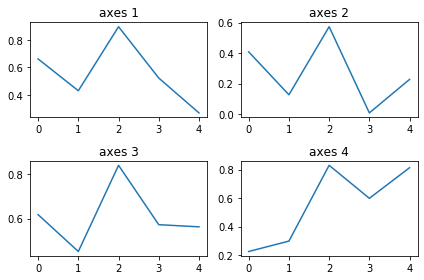

In [11]:
# figure객체와 여러 개의 axes 객체를 생성
# fig, axes = plt.subplots(row, col)
# subplot 위치 지정 : axes객체(리스트형태)에 인덱싱을 해서 처리
# axes[0, 0]
fig, axes = plt.subplots(2, 2)

axes[0, 0].plot(np.random.rand(5))
axes[0, 0].set_title('axes 1')

axes[0, 1].plot(np.random.rand(5))
axes[0, 1].set_title('axes 2')

axes[1, 0].plot(np.random.rand(5))
axes[1, 0].set_title('axes 3')

axes[1, 1].plot(np.random.rand(5))
axes[1, 1].set_title('axes 4')

plt.tight_layout()
plt.show()

#### 3. x축을 공유하면서 서로 다른 y축을 가지는 plot 생성

- axes 객체를 생성하여 서로 다른 y축 적용
    - axes.twinx() : 동일한 x축을 공유하는 axes를 반환

In [8]:
# 한글 폰트 지정
font_name = matplotlib.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)

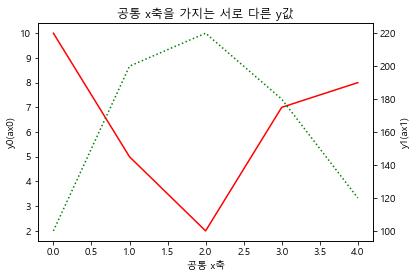

In [11]:
# 데이터 1 : 빨간 실선 -> ax0
# 데이터 2 : 녹색 점선 -> ax1
fig, ax0 = plt.subplots() # subplots()에 파라미터 지정을 안하면 1 x 1 기본 형태로 만들어진다.
ax1 = ax0.twinx()

ax0.plot([10, 5, 2, 7, 8], 'r-')
ax0.set_title('공통 x축을 가지는 서로 다른 y값')
ax0.set_ylabel('y0(ax0)')
ax0.set_xlabel('공통 x축')

ax1.plot([100, 200, 220, 180, 120], 'g:')
ax1.set_ylabel('y1(ax1)')
plt.show()

### 연습문제

In [14]:
# 데이터 생성
# x축으로 사용할 데이터 : 범주형 데이터 => 아이템 3~4개, 리스트/배열타입
# y축으로 사용할 데이터 : 정수 값 데이터 => 각각의 범주가 가지는 크기
category = ['part1', 'part2', 'part3']
values = [100, 30, 57]

In [15]:
# 크기가 (10,4)인 캔버스(figure) 객체 생성
# 크기를 plot에 반영하려면 코드 위치가 어디로?
# plt.plot() 코드와 동일한 셀에 위치
plt.figure(figsize=(10, 4))

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<BarContainer object of 3 artists>

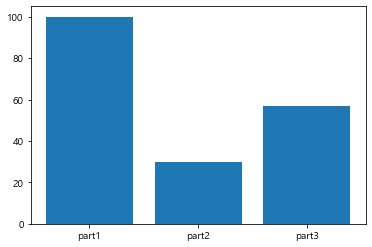

In [16]:
# bar plot 생성
plt.bar(category, values)

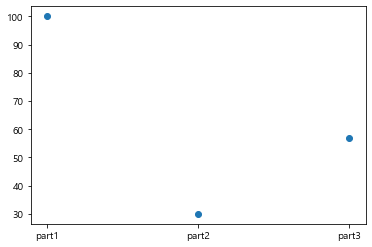

In [17]:
# scatter plot(산점도)생성
plt.scatter(category, values)

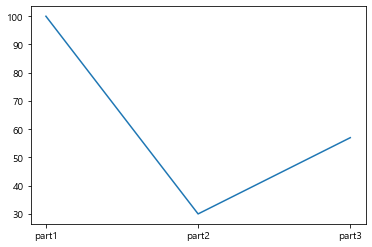

In [18]:
# line plot 생성
plt.plot(category, values)

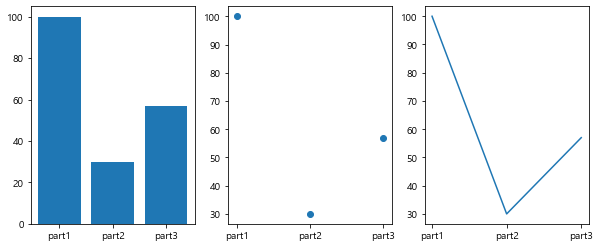

In [19]:
# 모든 subplot을 한 번에 보기 (1행 3열)
# 1번 위치 : bar plot
# 2번 위치 : scatter plot
# 3번 위치 : line plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.bar(category, values)

plt.subplot(1, 3, 2)
plt.scatter(category, values)

plt.subplot(1, 3, 3)
plt.plot(category, values)

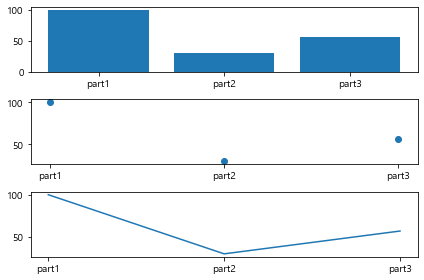

In [20]:
# 위의 3개 subplot을 3행 1열 구조로 변경해서 생성
# axes 객체로 서로 다른 ploting
fig, axes = plt.subplots(3, 1)
axes[0].bar(category, values)
axes[1].scatter(category, values)
axes[2].plot(category, values)
plt.tight_layout()
plt.show()